In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/DELL/Downloads/airline-passenger-traffic.csv',header=None)

In [4]:
df.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
df.columns = ['Date','Passengers']

In [6]:
df.head()

,Date,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        144 non-null    object 
 1   Passengers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [8]:
# there are 4 missing values in passengers column--> impute
# convert Date column to datetime format

In [9]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m')
df = df.set_index(df['Date'])

In [10]:
df.drop(['Date'],axis=1,inplace=True)

In [11]:
df.head()

,Passengers
Date,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  140 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [13]:
## Visulaize the timeseries data

In [14]:

df

,Passengers
Date,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


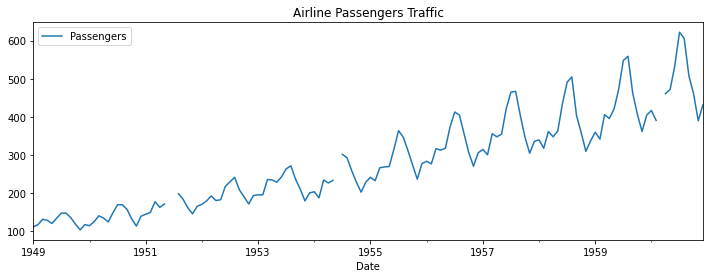

In [15]:
df.plot(figsize = (12,4))
plt.title('Airline Passengers Traffic')
plt.show()

In [16]:
## missing value imputation

df['Passengers'].mean()

280.73571428571427

In [17]:
df1 = df['Passengers'].fillna(df['Passengers'].mean())

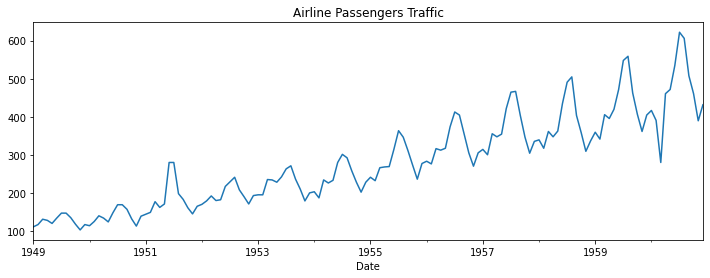

In [18]:
df1.plot(figsize = (12,4))
plt.title('Airline Passengers Traffic')
plt.show()

In [19]:
# method 2 last observed carried forward

df2 = df['Passengers'].fillna(method='ffill')

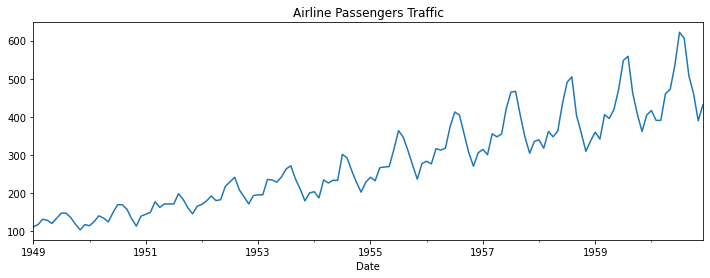

In [20]:
df2.plot(figsize = (12,4))
plt.title('Airline Passengers Traffic')
plt.show()

In [21]:
##method 3----> Linear interpolate
df['Passengers'] = df['Passengers'].interpolate(method='linear')

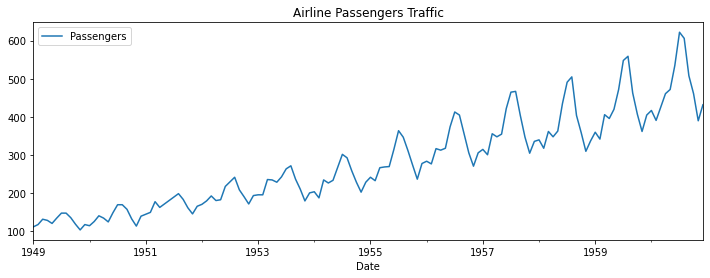

In [22]:
df.plot(figsize = (12,4))
plt.title('Airline Passengers Traffic')
plt.show()

In [23]:
# Detecting Outliers

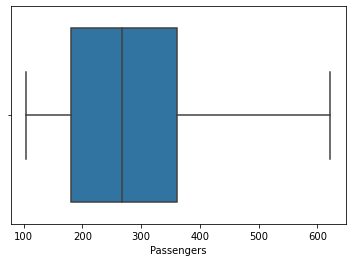

In [24]:
sns.boxplot(data = df, x='Passengers')
plt.show()

In [25]:
## Time series decomposition

import statsmodels.api as sm

In [26]:
decompose = sm.tsa.seasonal_decompose(df['Passengers'],model = 'additive')

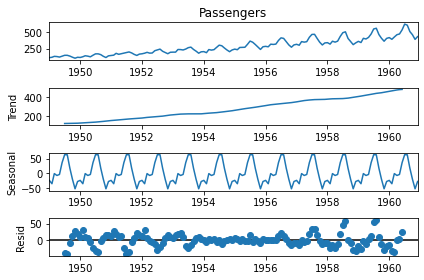

In [27]:
fig = decompose.plot()
plt.show()

In [28]:
decompose = sm.tsa.seasonal_decompose(df['Passengers'],model = 'multiplicative')

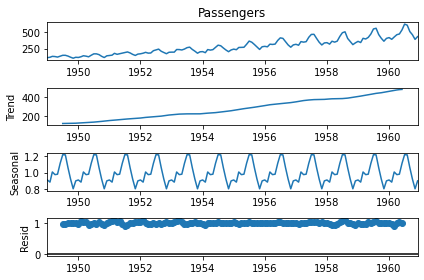

In [29]:
fig = decompose.plot()
plt.show()

In [30]:
## split time series data into training and test set

In [31]:
## smoothing methods

#1.naive method
#2.simple average method
#3.moving average

In [32]:
train_len = 120
train = df[0:train_len]
test = df[train_len:]

In [33]:
## 1.naive method

y_pred = train['Passengers'][train_len-1]
y_pred

337.0

In [34]:
test['NaiveForecast'] = y_pred
test

,Passengers,NaiveForecast
Date,,
1959-01-01,360.0,337.0
1959-02-01,342.0,337.0
1959-03-01,406.0,337.0
1959-04-01,396.0,337.0
1959-05-01,420.0,337.0
1959-06-01,472.0,337.0
1959-07-01,548.0,337.0
1959-08-01,559.0,337.0
1959-09-01,463.0,337.0


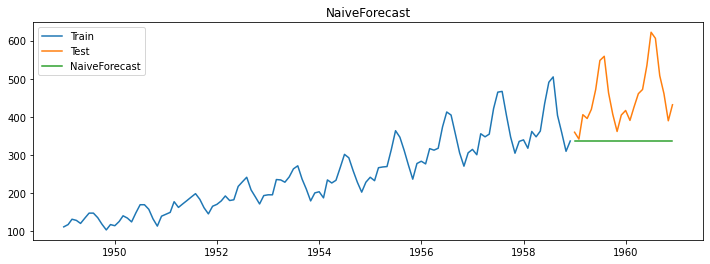

In [35]:
## visualize the result

plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(test['NaiveForecast'], label='NaiveForecast')
plt.legend(loc='best')
plt.title('NaiveForecast')
plt.show()

In [36]:
## 2.simple average method

In [37]:
y_pred = train.mean()

In [38]:
print(y_pred[0])

245.89166666666668


In [39]:
test['Simple_Average'] = y_pred[0]
test

,Passengers,NaiveForecast,Simple_Average
Date,,,
1959-01-01,360.0,337.0,245.891667
1959-02-01,342.0,337.0,245.891667
1959-03-01,406.0,337.0,245.891667
1959-04-01,396.0,337.0,245.891667
1959-05-01,420.0,337.0,245.891667
1959-06-01,472.0,337.0,245.891667
1959-07-01,548.0,337.0,245.891667
1959-08-01,559.0,337.0,245.891667
1959-09-01,463.0,337.0,245.891667


In [40]:
train_len = 120

In [41]:
train = df[0:train_len]
test = df[train_len:]

In [42]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [43]:
model = SimpleExpSmoothing(train['Passengers'])

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [44]:
model_fit = model.fit(smoothing_level=0.2,optimized=False)

In [45]:
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [46]:
y_pred = model_fit.forecast(24)
y_pred

1959-01-01    374.897327
1959-02-01    374.897327
1959-03-01    374.897327
1959-04-01    374.897327
1959-05-01    374.897327
1959-06-01    374.897327
1959-07-01    374.897327
1959-08-01    374.897327
1959-09-01    374.897327
1959-10-01    374.897327
1959-11-01    374.897327
1959-12-01    374.897327
1960-01-01    374.897327
1960-02-01    374.897327
1960-03-01    374.897327
1960-04-01    374.897327
1960-05-01    374.897327
1960-06-01    374.897327
1960-07-01    374.897327
1960-08-01    374.897327
1960-09-01    374.897327
1960-10-01    374.897327
1960-11-01    374.897327
1960-12-01    374.897327
Freq: MS, dtype: float64

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [48]:
model = ExponentialSmoothing(np.asarray(train['Passengers']),seasonal_periods=12,trend='multiplicative',seasonal=None)

In [49]:
model = model.fit(smoothing_level=0.2, smoothing_slope=0.01,optimized=False)

In [50]:
model.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 1.0535714285714286,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [51]:
y_pred = model.forecast(24)

In [52]:
test['Prediction'] = y_pred

In [53]:
test['Passengers']

Date
1959-01-01    360.0
1959-02-01    342.0
1959-03-01    406.0
1959-04-01    396.0
1959-05-01    420.0
1959-06-01    472.0
1959-07-01    548.0
1959-08-01    559.0
1959-09-01    463.0
1959-10-01    407.0
1959-11-01    362.0
1959-12-01    405.0
1960-01-01    417.0
1960-02-01    391.0
1960-03-01    426.0
1960-04-01    461.0
1960-05-01    472.0
1960-06-01    535.0
1960-07-01    622.0
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, dtype: float64

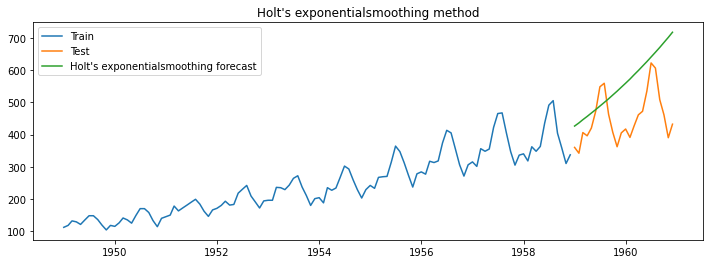

In [54]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(test['Prediction'],label='Holt\'s exponentialsmoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s exponentialsmoothing method')
plt.show()

### AR Model

In [55]:
from statsmodels.tsa.stattools import kpss,adfuller

In [56]:
kpss_test = kpss(df['Passengers'])

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [58]:
print('KPSS Statistic: %f' %kpss_test[0])
print('Critical Values @ 0.05: %2f' %kpss_test[3]['5%'])
print('p-value: %f' %kpss_test[1])

KPSS Statistic: 1.052050
Critical Values @ 0.05: 0.463000
p-value: 0.010000


In [59]:
from scipy.stats import boxcox

In [60]:
df['boxcox'] = boxcox(df['Passengers'],lmbda = 0)

In [61]:
df.head()

,Passengers,boxcox
Date,,
1949-01-01,112.0,4.718499
1949-02-01,118.0,4.770685
1949-03-01,132.0,4.882802
1949-04-01,129.0,4.859812
1949-05-01,121.0,4.795791


In [62]:
adf_test = adfuller(df['boxcox'])

In [63]:
print('p-value: %f' % adf_test[1])

p-value: 0.428029


In [64]:
df['boxcox_diff'] = df['boxcox'] - df['boxcox'].shift()

In [65]:
df.head()

,Passengers,boxcox,boxcox_diff
Date,,,
1949-01-01,112.0,4.718499,NaN
1949-02-01,118.0,4.770685,0.052186
1949-03-01,132.0,4.882802,0.112117
1949-04-01,129.0,4.859812,-0.022990
1949-05-01,121.0,4.795791,-0.064022


In [66]:
df.dropna(inplace=True)

In [67]:
df.head()

,Passengers,boxcox,boxcox_diff
Date,,,
1949-02-01,118.0,4.770685,0.052186
1949-03-01,132.0,4.882802,0.112117
1949-04-01,129.0,4.859812,-0.022990
1949-05-01,121.0,4.795791,-0.064022
1949-06-01,135.0,4.905275,0.109484


In [68]:
adf_test = adfuller(df['boxcox_diff'])

In [69]:
print('p-value: %f' %adf_test[1])

p-value: 0.015326


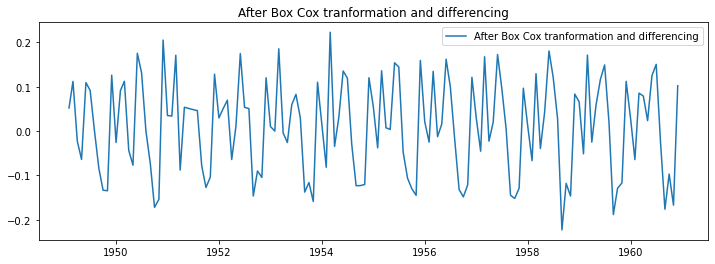

In [70]:
plt.figure(figsize=(12,4))
plt.plot(df['boxcox_diff'], label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox tranformation and differencing')
plt.show()